Rafał Nowak
# Visualization of CIFAR10 dataset

In [1]:
#import logging
#logging.basicConfig(level=logging.DEBUG)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load CIFAR10 dataset

In [3]:
import myutils

data_training, data_testing = myutils.load_CIFAR_dataset(shuffle=False)

n_training = len( data_training )
n_testing = len( data_testing )
print('Loaded CIFAR10 database with {} training and {} testing samples'.format(n_training, n_testing))

Loaded CIFAR10 database with 50000 training and 10000 testing samples


## Some examples from each class

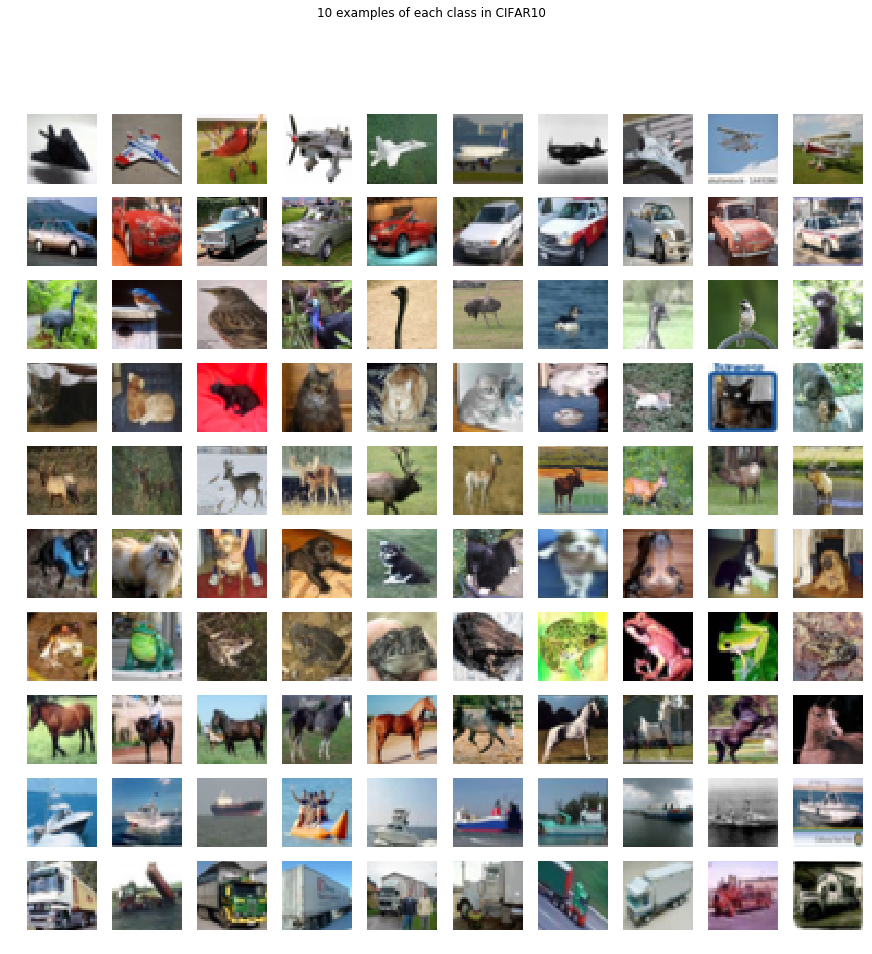

In [4]:
nclasses  = 10 # number of classes to visualize
nexamples = 10 # number of examples for each class

# Chosing indices from training set images
training_labels = np.array( data_training )[:,1]
img_idx = [ np.where(training_labels==class_id)[0][0:nexamples] for class_id in range(nclasses)  ]
        
# Creating plot with subplots
fig, axarr = plt.subplots(nclasses,nexamples,figsize=(15,15))
for class_id in range(nclasses):
    for i in range(nexamples):
        axarr[class_id,i].imshow(data_training[img_idx[class_id][i]][0])
        axarr[class_id,i].axis('off')

fig.suptitle('{} examples of each class in CIFAR10'.format(nexamples))
class_names = myutils.load_CIFAR_classnames()

#TODO: add class names to the plot

plt.show()

## Training data decomposition to 2D

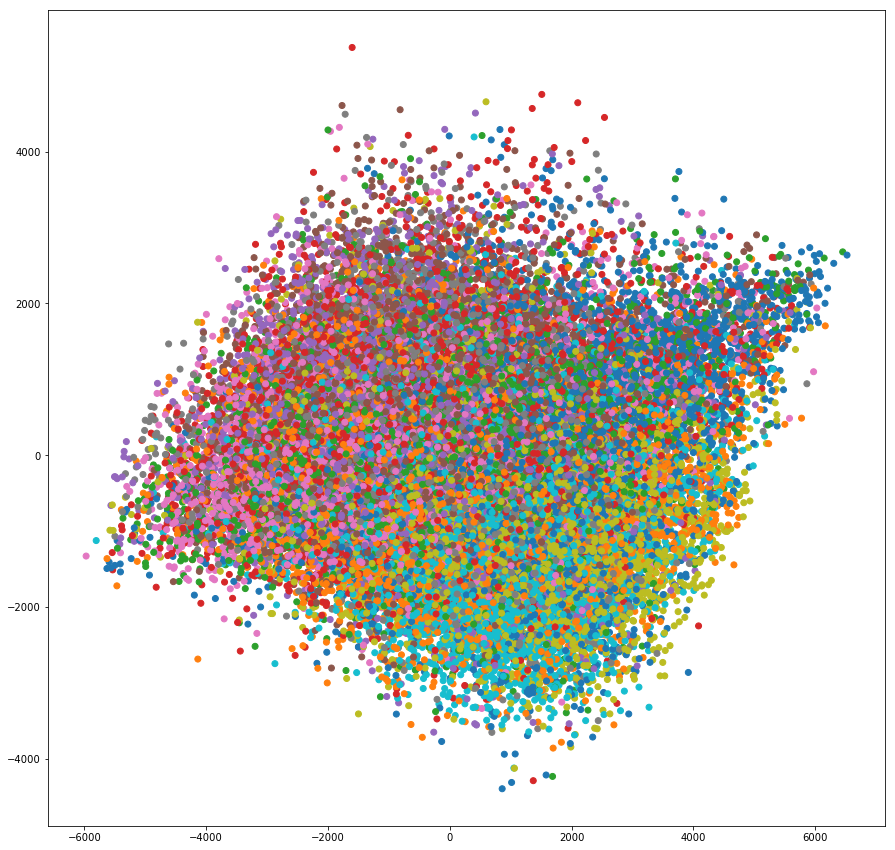

In [5]:
nsamples = 50000
features = np.array( [ data_training[i][0].flatten() for i in range(nsamples)] )
labels   = np.array( [ data_training[i][1] for i in range(nsamples)])

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(features)

X = pca.transform(features)

from matplotlib import pyplot as plt
plt.figure( figsize=(15,15) )
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.show()